In [ ]:
 #Imporing Libraries - Initiated by AZ 03/16/25 11:56AM
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

**Explaratory Data Analysis (EDA)**

In [ ]:
#Import the data from the file into a Pandas Series object in Python. - Initiated by AZ
url = "https://raw.githubusercontent.com/AZhuk30/Applied-Data-Mining/refs/heads/main/CreditCardData.csv"
data = pd.read_csv(url)
print(data)

      Transaction ID       Date Day of Week  Time Type of Card Entry Mode  \
0          #3577 209  14-Oct-20   Wednesday    19         Visa        Tap   
1          #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   
2          #2694 780  14-Oct-20   Wednesday    14         Visa        Tap   
3          #2640 960  13-Oct-20     Tuesday    14         Visa        Tap   
4          #2771 031  13-Oct-20     Tuesday    23         Visa        CVC   
...              ...        ...         ...   ...          ...        ...   
99995      #3203 892  13-Oct-20     Tuesday    22   MasterCard        Tap   
99996      #3304 849  14-Oct-20   Wednesday    23   MasterCard        PIN   
99997      #3532 129  13-Oct-20     Tuesday    11   MasterCard        PIN   
99998      #3107 092  14-Oct-20   Wednesday    22         Visa        Tap   
99999      #3400 711  14-Oct-20   Wednesday    16         Visa        PIN   

      Amount Type of Transaction Merchant Group Country of Transaction  \
0

In [ ]:
data = data.dropna()

In [ ]:
#Conversion of Boolean to Binary
print(data['Entry Mode'].value_counts())

Entry Mode
PIN    49966
CVC    33470
Tap    16541
Name: count, dtype: int64


In [ ]:
entry_dummies = pd.get_dummies(data['Entry Mode'], prefix='Entry')
data = pd.concat([data, entry_dummies], axis=1)
data = data.drop('Entry Mode', axis=1)
data = data.drop('Entry_Tap', axis=1)
data[['Entry_PIN', 'Entry_CVC']] = data[['Entry_PIN', 'Entry_CVC']].astype(int)
data

,Transaction ID,Date,Day of Week,Time,Type of Card,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,Entry_CVC,Entry_PIN
0,#3577 209,14-Oct-20,Wednesday,19,Visa,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,0,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,0,1
2,#2694 780,14-Oct-20,Wednesday,14,Visa,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0,0,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,0,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0,0,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0,0,1
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0,0,1
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0,0,0


In [ ]:
data['Amount'] = data['Amount'].astype(str)
data['Amount'] = data['Amount'].str.replace(r'[^\d.]', '', regex=True)
data['Amount'] = data['Amount'].replace('', np.nan)
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

conf = data.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()
conf

['Time', 'Amount', 'Age', 'Fraud', 'Entry_CVC', 'Entry_PIN']

In [ ]:
plt.style.use('ggplot')

In [ ]:
data.describe()

,Time,Amount,Age,Fraud,Entry_CVC,Entry_PIN
count,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000
mean,14.563100,112.579933,44.993595,0.071937,0.334777,0.499775
std,5.308202,123.435613,9.948121,0.258384,0.471915,0.500002
min,0.000000,5.000000,15.000000,0.000000,0.000000,0.000000
25%,10.000000,17.000000,38.200000,0.000000,0.000000,0.000000
50%,15.000000,30.000000,44.900000,0.000000,0.000000,0.000000
75%,19.000000,208.000000,51.700000,0.000000,1.000000,1.000000
max,24.000000,400.000000,86.100000,1.000000,1.000000,1.000000


**Univariate Analysis**

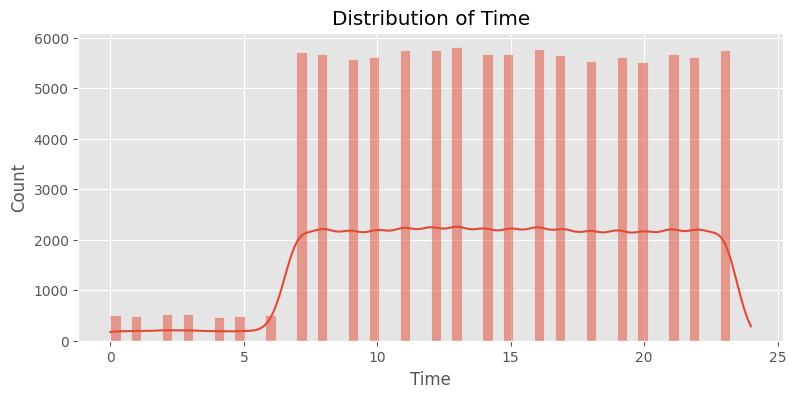

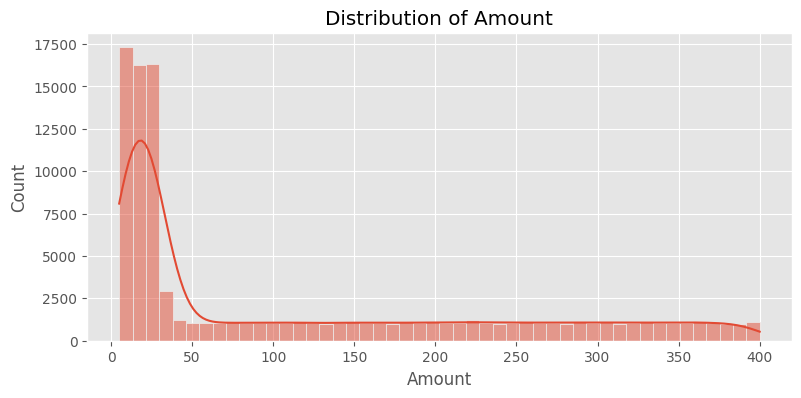

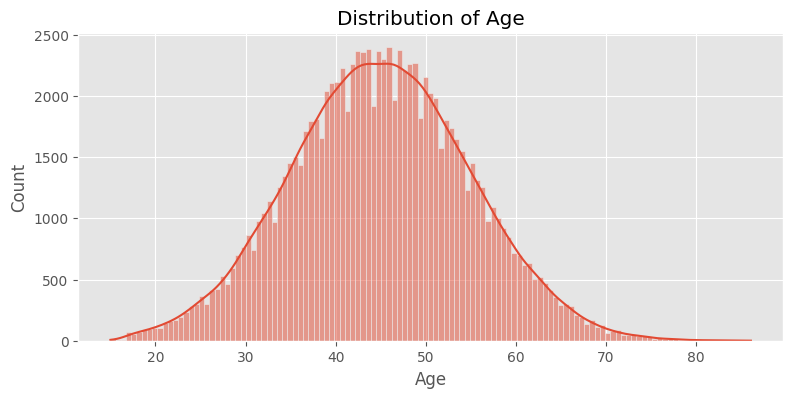

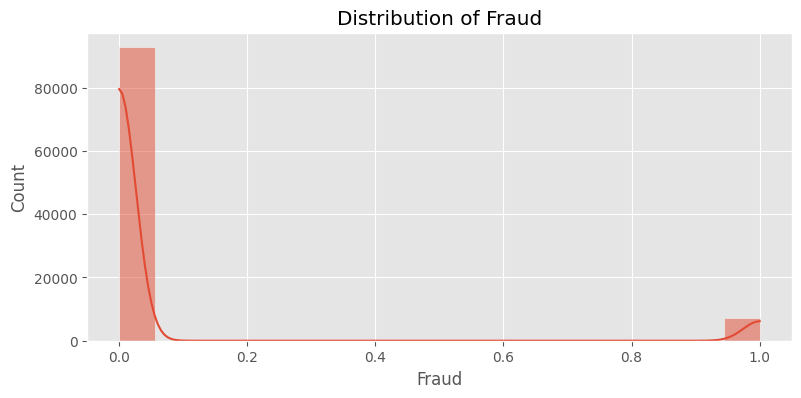

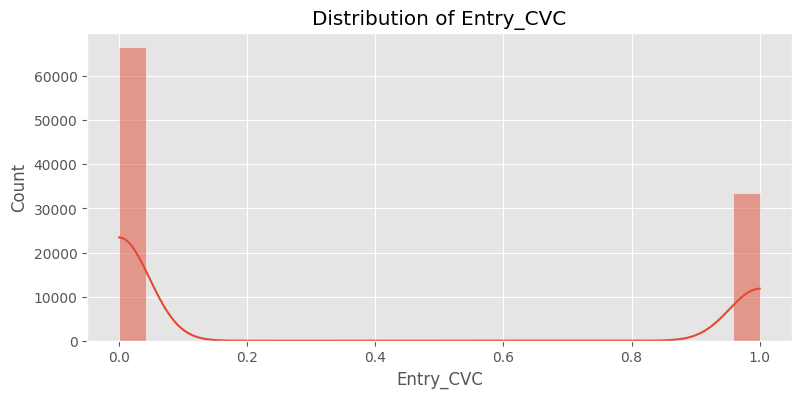

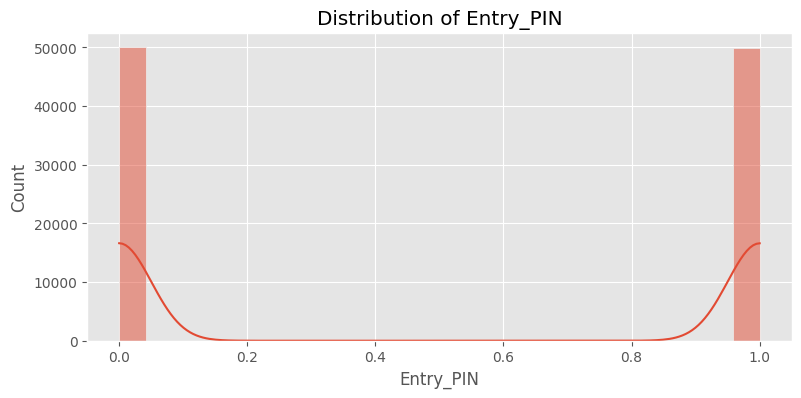

In [ ]:
for column in conf:
  plt.figure(figsize=(20, 4))
  plt.subplot(1, 2, 1)
  sns.histplot(data[column], kde = True)
  plt.title(f'Distribution of {column}')
  plt.show()

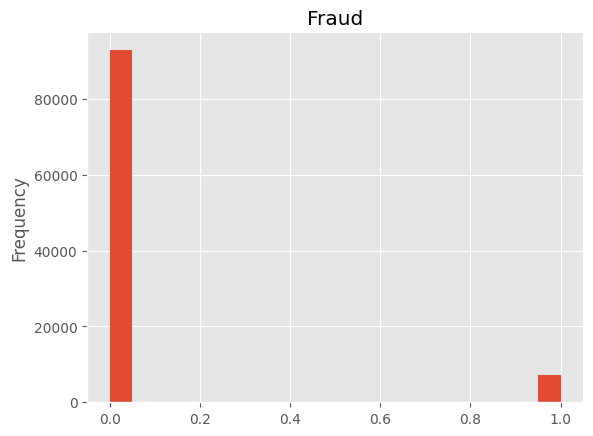

In [ ]:
data['Amount'] = data['Amount'].astype(str)
data['Amount'] = data['Amount'].str.replace(r'[^\d.]', '', regex=True)
data['Amount'] = data['Amount'].replace('', np.nan)
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
numerical_columns = ["Time", "Amount", "Age", "Entry_CVC", "Entry_PIN", "Fraud"]
corr_matrix = data[numerical_columns].corr()
numeric_data = data.select_dtypes(include=['number'])
numeric_data

from matplotlib import pyplot as plt
numeric_data['Fraud'].plot(kind='hist', bins=20, title='Fraud')
plt.gca().spines[['top', 'right',]].set_visible(False)

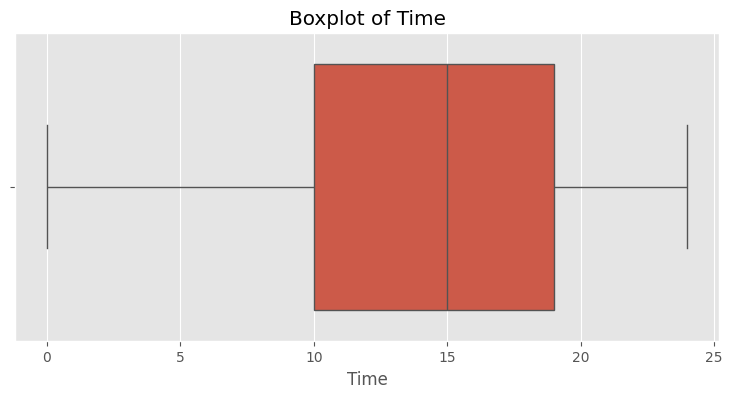

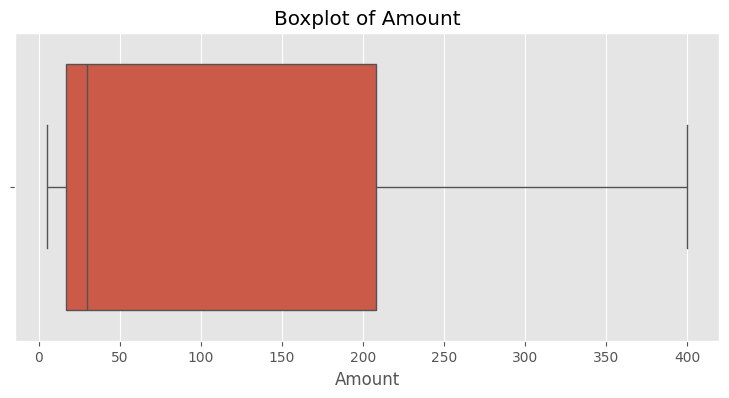

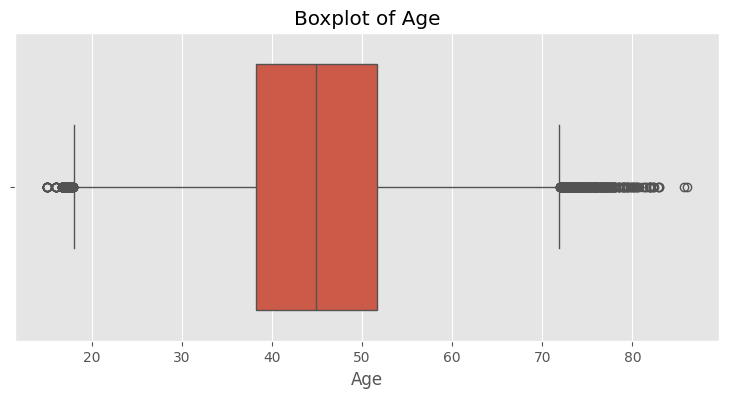

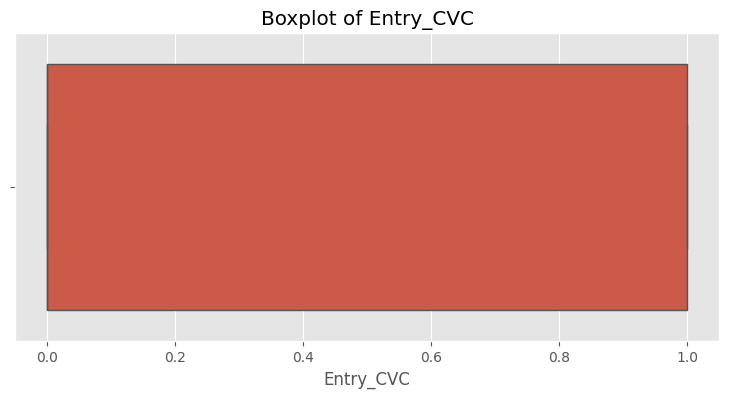

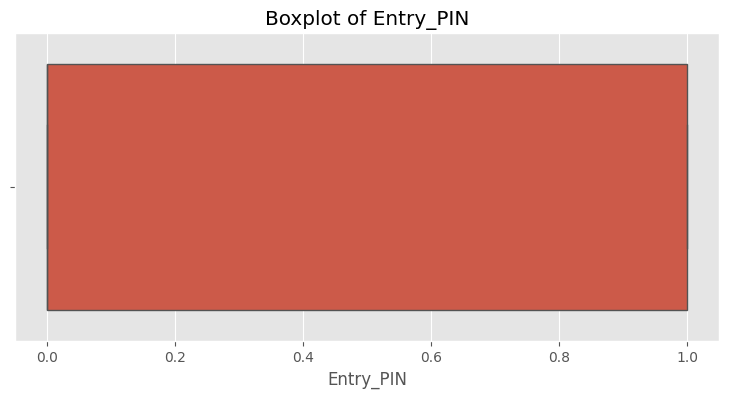

In [ ]:
#Plot boxplots of all continuous features
plt.style.use('ggplot')
for column in conf:
  if column != 'Fraud':
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**Multivariate Analysis**

In [ ]:
#Correlation Matrix

In [ ]:
data['Amount'] = data['Amount'].astype(str)
data['Amount'] = data['Amount'].str.replace(r'[^\d.]', '', regex=True)
data['Amount'] = data['Amount'].replace('', np.nan)
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
numerical_columns = ["Time", "Amount", "Age", "Entry_CVC", "Entry_PIN", "Fraud"]
corr_matrix = data[numerical_columns].corr()
numeric_data = data.select_dtypes(include=['number'])
numeric_data

,Time,Amount,Age,Fraud,Entry_CVC,Entry_PIN
0,19,5,25.2,0,0,0
1,17,288,49.6,0,0,1
2,14,5,42.2,0,0,0
3,14,28,51.0,0,0,0
4,23,91,38.0,1,1,0
...,...,...,...,...,...,...
99995,22,15,53.8,0,0,0
99996,23,7,45.0,0,0,1
99997,11,21,46.5,0,0,1
99998,22,25,48.2,0,0,0


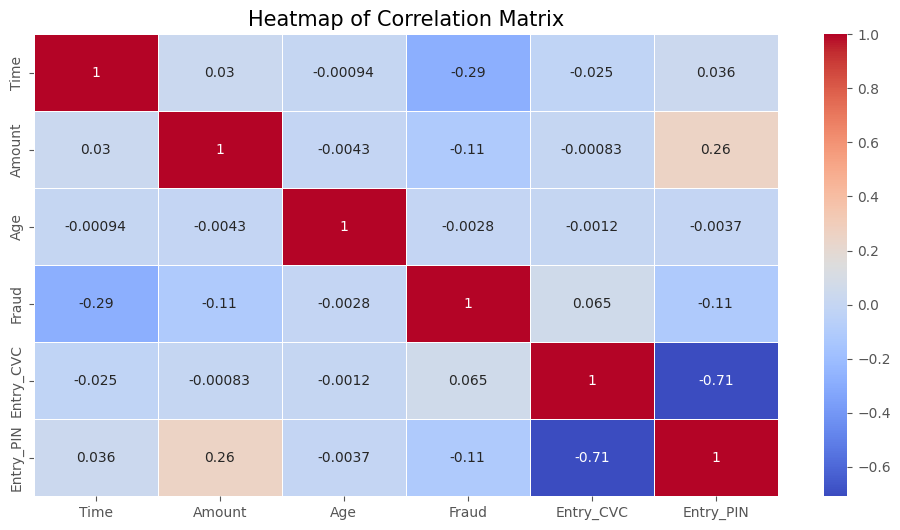

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix", fontsize=15)
plt.show()

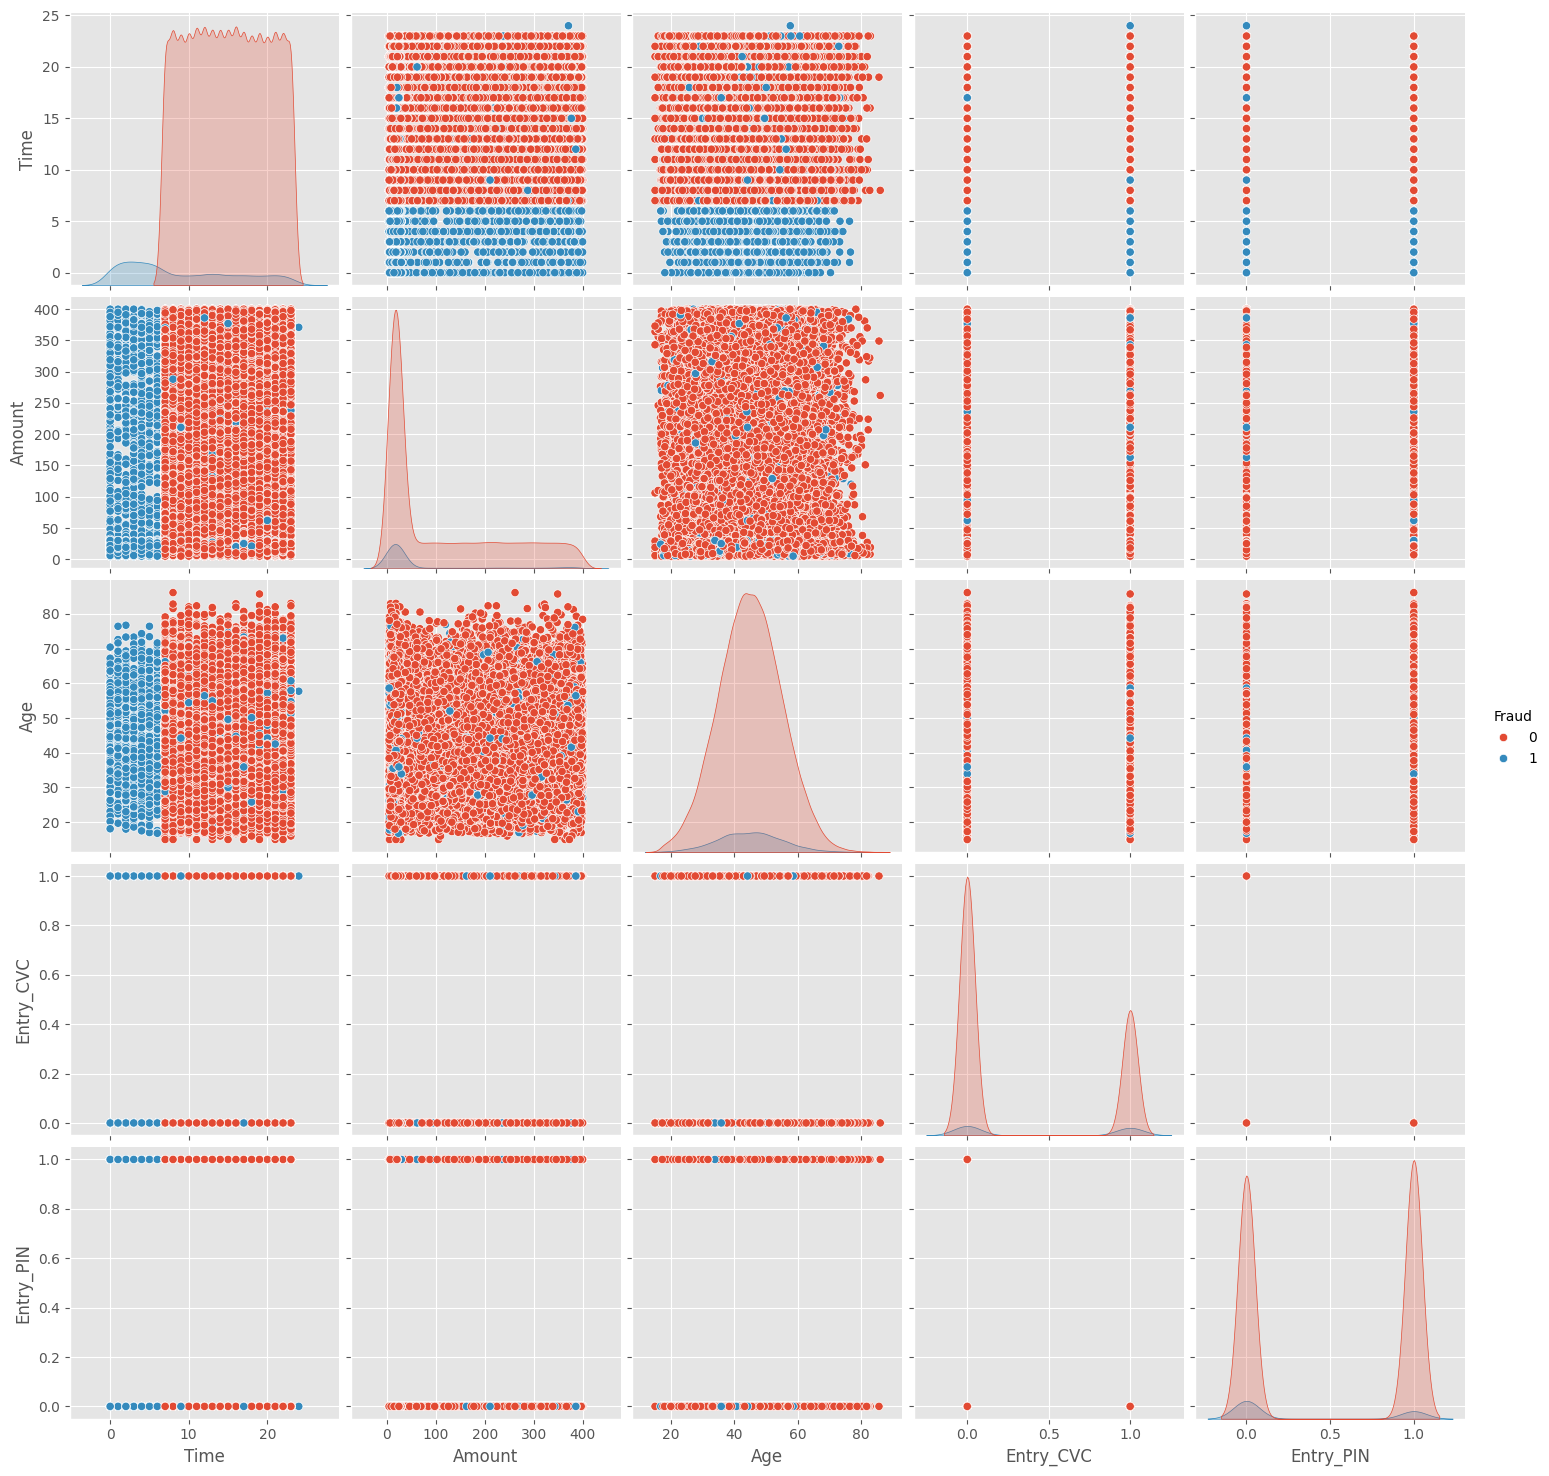

In [ ]:
sns.pairplot(numeric_data, hue ="Fraud", height=3)
plt.show()

**Train_test Split of the Data ("CreditCardData.csv")**

In [ ]:
#Partitioned the data set, so that 80% of the records are included in the training data set and and 20% are included in the test data set
#Will use a bar graph to confirm the proportion - Initiated by AZ 03/30/2025 4:56pm
project_data_train, project_data_test = train_test_split(data, test_size=0.2, random_state=7)

In [ ]:
x = ['Original Dataset', 'Training Data', 'Test Data']
y = [data.shape[0], project_data_train.shape[0], project_data_test.shape[0]]
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(title_text='Confirming Split')
fig.show()

In [ ]:
#Identified the total number of records in the training data set and how many records in the training data set have a Fraud value of 1
project_data_train.shape[0] #There are 80000 records in the training set - Initiated by AZ 03/30/2025 4:56pm

79981

In [ ]:
bool(project_data_train.shape[0] == round(data.shape[0]*.8))
project_data_train['Fraud'].value_counts() #- Initiated by AZ 03/30/2025 4:56pm

,count
Fraud,
0,74229
1,5752


In [ ]:
ratio = project_data_train['Fraud'].value_counts()/[1]/project_data_train.shape[0] * 100 #- Initiated by AZ 03/30/2025 4:56pm
ratio

,count
Fraud,
0,92.808292
1,7.191708


In [ ]:
#Identified the total number of records in the training data set and how many records in the training data set have a Fraud value of 1
project_data_train.shape[0] #There are 20000 records in the training set - Initiated by AZ 03/30/2025 4:56pm
bool(project_data_test.shape[0] == round(data.shape[0]*.2))
project_data_test['Fraud'].value_counts() #- Initiated by AZ 03/30/2025 4:56pm

,count
Fraud,
0,18556
1,1440


In [ ]:
ratio = project_data_test['Fraud'].value_counts()/[1]/project_data_test.shape[0] * 100 #- Initiated by AZ 03/30/2025 4:56pm
ratio

,count
Fraud,
0,92.79856
1,7.20144


In [ ]:
#Validate partition of testing for the difference in mean of Age for the training set versus the test set. - Initiated by AZ

In [ ]:
print("Training Age Mean:", round(project_data_train['Age'].mean(),2)) #- Initiated by AZ
print("Test Age Mean:", round(project_data_test['Age'].mean(),2))

Training Age Mean: 44.99
Test Age Mean: 45.0


In [ ]:
stats.ttest_ind(project_data_train['Age'], project_data_test['Age']) #- Initiated by AZ

TtestResult(statistic=np.float64(-0.1667300712495496), pvalue=np.float64(0.8675827804689238), df=np.float64(99975.0))

The p value is not less than 0.05; so there is not a statistically significant difference in the two datasets on this variable. This validates that the training and test sets should be similar on this variable.

In [ ]:
#Validate partition of testing for the difference in mean of Time for the training set versus the test set. - Initiated by AZ

In [ ]:
print("Training Time Mean:", round(project_data_train['Time'].mean(),2))
print("Test Time Mean:", round(project_data_test['Time'].mean(),2))

Training Time Mean: 14.58
Test Time Mean: 14.51


In [ ]:
stats.ttest_ind(project_data_train['Time'], project_data_test['Time']) #- Initiated by AZ

TtestResult(statistic=np.float64(1.5620960576376095), pvalue=np.float64(0.11826852669817096), df=np.float64(99975.0))

The p value is not less than 0.05; so there is not a statistically significant difference in the two datasets on this variable. This validates that the training and test sets should be similar on this variable.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC
from tabulate import tabulate

In [ ]:
ytrain = project_data_train[['Fraud']]

In [ ]:
#Used ChatGpt for entire paragraph to convert column Amount into string, get rid of currency symbol, make sure empty strings are converted to Nan and finally convert to float
project_data_train['Amount'] = project_data_train['Amount'].astype(str)
project_data_train['Amount'] = project_data_train['Amount'].str.replace(r'[^\d.]', '', regex=True)
project_data_train['Amount'] = project_data_train['Amount'].replace('', np.nan)
project_data_train['Amount'] = pd.to_numeric(project_data_train['Amount'], errors='coerce')

project_data_test['Amount'] = project_data_test['Amount'].astype(str)
project_data_test['Amount'] = project_data_test['Amount'].str.replace(r'[^\d.]', '', regex=True)
project_data_train['Amount'] = project_data_train['Amount'].replace('', np.nan)
project_data_test['Amount'] = pd.to_numeric(project_data_test['Amount'], errors='coerce')

In [ ]:
#Will be using Age as one of the variables to predict Fraud
Xtrain = project_data_train[['Age', 'Time', 'Amount', 'Entry_CVC', 'Entry_PIN']]

In [ ]:
X_names = ["Age", "Time", "Amount", 'Entry_CVC', 'Entry_PIN']

In [ ]:
y_names =["0", "1"]

In [ ]:
Xtrain

,Age,Time,Amount,Entry_CVC,Entry_PIN
61689,62.6,20,240,0,1
12950,43.9,18,12,0,1
67886,55.6,21,98,0,1
24212,40.4,21,19,1,0
9198,53.9,14,126,0,1
...,...,...,...,...,...
53471,46.5,21,258,1,0
10751,46.7,11,21,0,1
49701,54.4,18,27,1,0
58577,38.1,23,159,0,1


Baseline Model (Logistic Regression)

In [ ]:
X = pd.DataFrame(Xtrain[['Age','Time','Amount','Entry_CVC','Entry_PIN']])

In [ ]:
X = sm.add_constant(X)

In [ ]:
y = pd.DataFrame(ytrain[['Fraud']])

In [ ]:
logreg01 = sm.Logit(y, X).fit()


Optimization terminated successfully.
         Current function value: 0.208073
         Iterations 8


In [ ]:
logreg01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Fraud   No. Observations:                79981
Model:                          Logit   Df Residuals:                    79975
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.1953
Time:                        22:21:58   Log-Likelihood:                -16642.
converged:                       True   LL-Null:                       -20681.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7263      0.080      9.045      0.000       0.569       0.884
Age           -0.0018      0.001     -1.215      0.224      -0.005       0.001
Time          -0.2231      0.003    -69.536      0.000      -0.229      -0.217
Amount        -0.0036      0.000    -22.240      0.000      -0.004      -0.003
Entry_CVC      0.1062      0.039      2.749      0.006       0.030       0.182
Entry_PIN     -0.6043      0.042    -14.523      0.000      -0.686      -0.523
==============================================================================
"""

In [ ]:
#p(Fraud) = (exp(0.7623-0.0018(Age)-0.2231(Time)-0.0036(Amount)+0.1062(Entry_CVC)-0.6043(Entry_PIN))/(1+exp(0.7623-0.0018(Age)-0.2231(Time)-0.0036(Amount)+0.1062(Entry_CVC)-0.6043(Entry_PIN))

In [ ]:
#Validating the model usinfg the test data set - AZ

In [ ]:
y_test = project_data_test[['Fraud']]
X_test = pd.DataFrame(project_data_test[['Age','Time','Amount','Entry_CVC','Entry_PIN']])

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
logreg01_test = sm.Logit(y_test, X_test).fit()

Optimization terminated successfully.
         Current function value: 0.205573
         Iterations 8


In [ ]:
logreg01_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Fraud   No. Observations:                19996
Model:                          Logit   Df Residuals:                    19990
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.2057
Time:                        22:21:58   Log-Likelihood:                -4110.6
converged:                       True   LL-Null:                       -5175.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8904      0.160      5.554      0.000       0.576       1.205
Age           -0.0011      0.003     -0.386      0.699      -0.007       0.005
Time          -0.2409      0.007    -36.364      0.000      -0.254      -0.228
Amount        -0.0031      0.000     -9.903      0.000      -0.004      -0.002
Entry_CVC     -0.0096      0.079     -0.122      0.903      -0.164       0.144
Entry_PIN     -0.6380      0.083     -7.645      0.000      -0.802      -0.474
==============================================================================
"""

In [ ]:
#Age and Entry_CVC have p-values higher than 0.05, and can be omitted from the model.


In [ ]:
logreg01.predict(X_test)
test_predictions_log = logreg01.predict(X_test)
predicted_log = (test_predictions_log > 0.5).astype(int)  # For binary classification

In [ ]:
cm_log = confusion_matrix(y_test, predicted_log)
cm_log

array([[18556,     0],
       [ 1221,   219]])

In [ ]:
TN_log = cm_log[0][0]
FP_log = cm_log[0][1]
FN_log = cm_log[1][0]
TP_log = cm_log[1][1]

table = [['', "Predicted: 0", "Predicted: 1"], ["Actual: 0", TN_log, FP_log], ["Actual: 1", FN_log, TP_log]]
print(tabulate(table, headers='firstrow'))

             Predicted: 0    Predicted: 1
---------  --------------  --------------
Actual: 0           18556               0
Actual: 1            1221             219


In [ ]:
GT_log = TN_log + FP_log + FN_log + TP_log
Accuracy_log = (TN_log + TP_log)/GT_log
ErrorRate_log = 1-Accuracy_log
Sensitivity_log = TP_log/(FN_log + TP_log)
Recall_log = Sensitivity_log
Specificity_log = TN_log/(TN_log + FP_log)
Precision_log = TP_log/(FP_log + TP_log)
F1_log = (2*Precision_log*Recall_log)/(Precision_log + Recall_log)
F2_log = (5*Precision_log*Recall_log)/((4*Precision_log) + Recall_log)
F0_5_log = (1.25*Precision_log*Recall_log)/((.25*Precision_log)+Recall_log)
roc_auc = roc_auc_score(y_test, predicted_log)

In [ ]:
roc_auc

np.float64(0.5760416666666667)

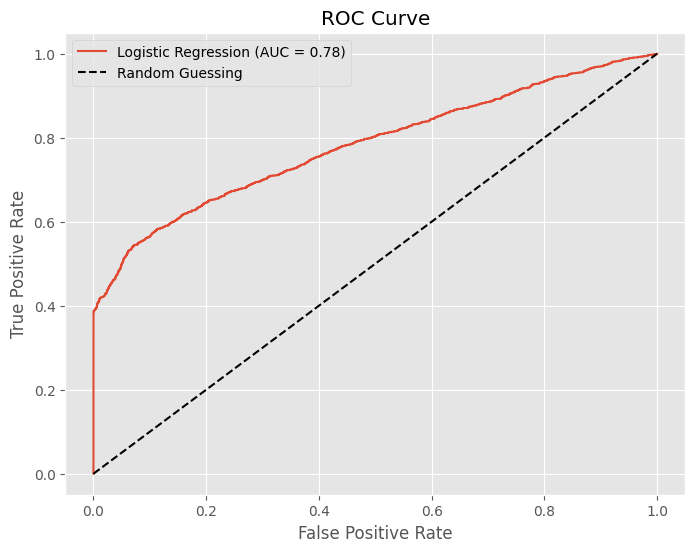

In [ ]:
y_prob = logreg01.predict(X_test)
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

C5.0 Model

In [ ]:
c5_01 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5).fit(Xtrain,ytrain)

In [ ]:
train_predictions = c5_01.predict(Xtrain)
train_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ytest= project_data_test[['Fraud']]

In [ ]:
Xtest = project_data_test[['Age', 'Time', 'Amount', 'Entry_CVC', 'Entry_PIN']]

In [ ]:
test_predictions = c5_01.predict(Xtest)

In [ ]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
export_graphviz(c5_01, out_file="project_data_test_c50_01.dot", feature_names=X_names, class_names=y_names, filled=True, rounded=True)

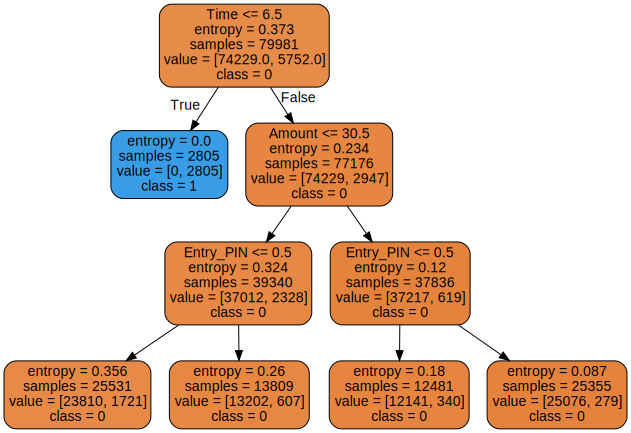

In [ ]:
###C
with open("project_data_test_c50_01.dot") as f:dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
cm = confusion_matrix(ytest, test_predictions)
cm

array([[18556,     0],
       [  709,   731]])

In [ ]:
c5_01 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5).fit(Xtest,ytest)

In [ ]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

table = [['', "Predicted: 0", "Predicted: 1"], ["Actual: 0", TN, FP], ["Actual: 1", FN, TP]]
print(tabulate(table, headers='firstrow'))

             Predicted: 0    Predicted: 1
---------  --------------  --------------
Actual: 0           18556               0
Actual: 1             709             731


In [ ]:
GT = TN + FP + FN + TP
Accuracy = (TN + TP)/GT
ErrorRate = 1-Accuracy
Sensitivity = TP/(FN + TP)
Recall = Sensitivity
Specificity = TN/(TN + FP)
Precision = TP/(FP + TP)
F1 = (2*Precision*Recall)/(Precision + Recall)
F2 = (5*Precision*Recall)/((4*Precision) + Recall)
F0_5 = (1.25*Precision*Recall)/((.25*Precision)+Recall)
roc_auc_c50 = roc_auc_score(y_test, test_predictions)

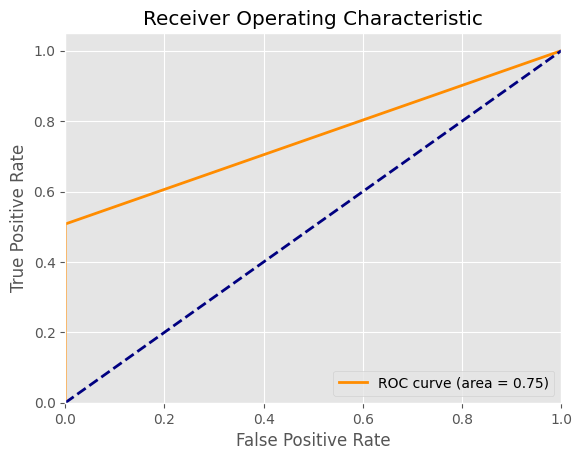

In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, test_predictions)
roc_auc_c50 = roc_auc_score(y_test, test_predictions)

plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_c50)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_c50

np.float64(0.7538194444444444)

In [ ]:
Accuracy2 = 0
ErrorRate2 = 1-Accuracy2
Sensitivity2 = 0
Recall2 = Sensitivity2
Specificity2 = 0
Precision2 = 0
F1_2 = 0
F2_2 = 0
F0_5_2 = 0

In [ ]:
 #C5.0 model - Initiated by AZ 7:38pm
 print(tabulate({' ': ['Accuracy', "Error Rate", "Sensitivity", "Specificity", "Precision", "F1", "F2", "F0.5"],
'Logistic Regression (Baseline)': [Accuracy_log, ErrorRate_log, Sensitivity_log, Specificity_log,Precision_log, F1_log, F2_log, F0_5_log],
'C5.0': [Accuracy, ErrorRate, Sensitivity, Specificity, Precision, F1, F2, F0_5]},headers="keys"))

               Logistic Regression (Baseline)       C5.0
-----------  --------------------------------  ---------
Accuracy                            0.938938   0.964543
Error Rate                          0.0610622  0.0354571
Sensitivity                         0.152083   0.507639
Specificity                         1          1
Precision                           1          1
F1                                  0.264014   0.673422
F2                                  0.183141   0.563087
F0.5                                0.472798   0.837534


Random Forest

In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
rfy = np.ravel(ytrain)
rfy

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
rf01 = RandomForestClassifier(n_estimators = 100,
criterion="gini").fit(Xtrain,rfy)

In [ ]:
rf01.predict(Xtrain)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
train_predictions_randomforest = rf01.predict(Xtrain)

In [ ]:
randomforest_test = rf01.predict(Xtest)
randomforest_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cm3 = confusion_matrix(ytest, randomforest_test)
cm3

array([[18429,   127],
       [  700,   740]])

In [ ]:
TN3 = cm3[0][0]
FP3 = cm3[0][1]
FN3 = cm3[1][0]
TP3 = cm3[1][1]

In [ ]:
TN3 = cm3[0][0]
FP3 = cm3[0][1]
FN3 = cm3[1][0]
TP3 = cm3[1][1]

table3 = [['', "Predicted: 0", "Predicted: 1"], ["Actual: 0", TN3, FP3], ["Actual: 1", FN3, TP3]]
print(tabulate(table3, headers='firstrow'))

             Predicted: 0    Predicted: 1
---------  --------------  --------------
Actual: 0           18429             127
Actual: 1             700             740


In [ ]:
GT3 = TN3 + FP3 + FN3 + TP3
Accuracy3 = (TN3 + TP3)/GT3
ErrorRate3 = 1-Accuracy3
Sensitivity3 = TP3/(FN3 + TP3)
Recall3 = Sensitivity3
Specificity3 = TN3/(TN3 + FP3)
Precision3 = TP3/(FP3 + TP3)
F1_3 = (2*Precision3*Recall3)/(Precision3 + Recall3)
F2_3 = (5*Precision3*Recall3)/((4*Precision3) + Recall3)
F0_5_3 = (1.25*Precision3*Recall3)/((.25*Precision3)+Recall3)
roc_auc_randomforest = roc_auc_score(y_test, randomforest_test)
roc_auc_randomforest

np.float64(0.7535223707216593)

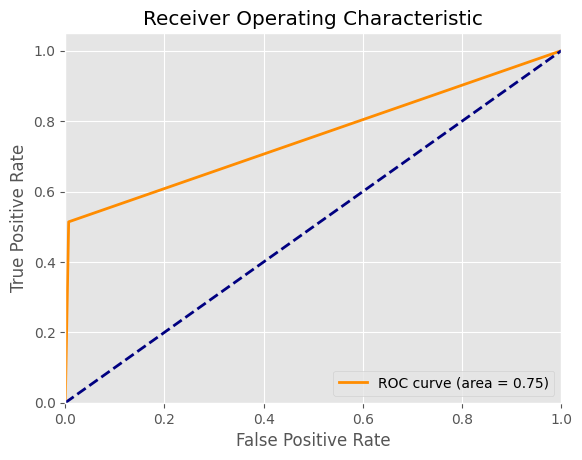

In [ ]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, randomforest_test)
roc_auc_randomforest = roc_auc_score(y_test, randomforest_test)

plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_randomforest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
 print(tabulate({' ': ['Accuracy', "Error Rate", "Sensitivity", "Specificity", "Precision", "F1", "F2", "F0.5"],
'Logistic Regression (Baseline)': [Accuracy_log, ErrorRate_log, Sensitivity_log, Specificity_log,Precision_log, F1_log, F2_log, F0_5_log],
'Random Forest': [Accuracy3, ErrorRate3, Sensitivity3, Specificity3, Precision3, F1_3, F2_3, F0_5_3]},headers="keys"))

               Logistic Regression (Baseline)    Random Forest
-----------  --------------------------------  ---------------
Accuracy                            0.938938         0.958642
Error Rate                          0.0610622        0.0413583
Sensitivity                         0.152083         0.513889
Specificity                         1                0.993156
Precision                           1                0.853518
F1                                  0.264014         0.641526
F2                                  0.183141         0.558322
F0.5                                0.472798         0.753871


In [ ]:
from sklearn.tree import plot_tree

Naive Bayes

In [ ]:
nb_01 = MultinomialNB().fit(Xtrain, ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
nb_01

MultinomialNB()

In [ ]:
nb_01.predict(Xtrain)

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
train_predictions_nb_01 = nb_01.predict(Xtest)
train_predictions_nb_01

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
cm4 = confusion_matrix(ytest, train_predictions_nb_01)
cm4

array([[ 8279, 10277],
       [  303,  1137]])

In [ ]:
TN4 = cm4[0][0]
FP4 = cm4[0][1]
FN4 = cm4[1][0]
TP4 = cm4[1][1]

table4 = [['', "Predicted: 0", "Predicted: 1"], ["Actual: 0", TN4, FP4], ["Actual: 1", FN4, TP4]]
print(tabulate(table4, headers='firstrow'))

             Predicted: 0    Predicted: 1
---------  --------------  --------------
Actual: 0            8279           10277
Actual: 1             303            1137


In [ ]:
GT4 = TN4 + FP4 + FN4 + TP4
Accuracy4 = (TN4 + TP4)/GT4
ErrorRate4 = 1-Accuracy4
Sensitivity4 = TP4/(FN4 + TP4)
Recall4 = Sensitivity4
Specificity4 = TN4/(TN4 + FP4)
Precision4 = TP4/(FP4 + TP4)
F1_4 = (2*Precision4*Recall4)/(Precision4 + Recall4)
F2_4 = (5*Precision4*Recall4)/((4*Precision4) + Recall4)
F0_5_4 = (1.25*Precision4*Recall4)/((.25*Precision4)+Recall4)
roc_auc_naivebayes = roc_auc_score(y_test, train_predictions_nb_01)
roc_auc_naivebayes

np.float64(0.6178731497449163)

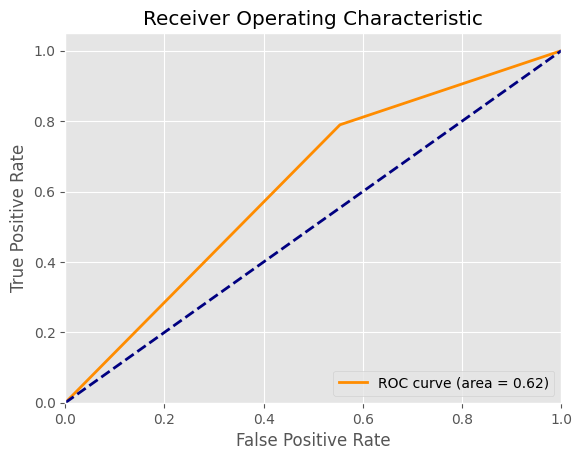

In [ ]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, train_predictions_nb_01)
roc_auc_train_predictions_nb = roc_auc_score(y_test, train_predictions_nb_01)

plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train_predictions_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
 print(tabulate({' ': ['Accuracy', "Error Rate", "Sensitivity", "Specificity", "Precision", "F1", "F2", "F0.5"],
'Logistic Regression (Baseline)': [Accuracy_log, ErrorRate_log, Sensitivity_log, Specificity_log,Precision_log, F1_log, F2_log, F0_5_log],
'Naive Bayes': [Accuracy4, ErrorRate4, Sensitivity4, Specificity4, Precision4, F1_4, F2_4, F0_5_4]},headers="keys"))

               Logistic Regression (Baseline)    Naive Bayes
-----------  --------------------------------  -------------
Accuracy                            0.938938       0.470894
Error Rate                          0.0610622      0.529106
Sensitivity                         0.152083       0.789583
Specificity                         1              0.446163
Precision                           1              0.0996145
F1                                  0.264014       0.17691
F2                                  0.183141       0.331024
F0.5                                0.472798       0.120711


CART

In [ ]:
cart_01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5).fit(Xtrain, ytrain)

In [ ]:
cart_preds = cart_01.predict(Xtrain)
cart_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cart_test = cart_01.predict(Xtest)
cart_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
export_graphviz(cart_01, out_file="cart_01_test.dot", feature_names=X_names, class_names=y_names)

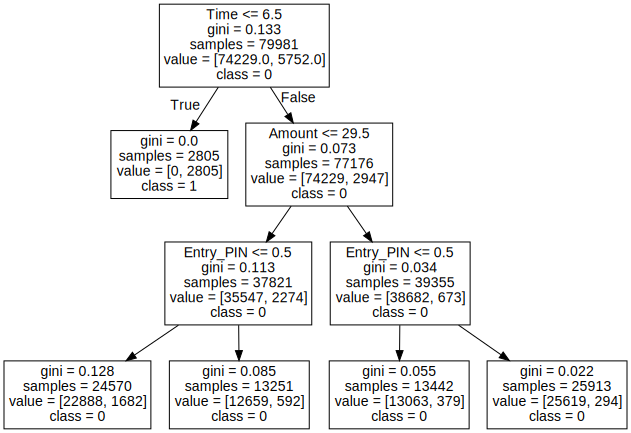

In [ ]:
with open("cart_01_test.dot") as f:cart_graph = f.read()
graphviz.Source(cart_graph)

In [ ]:
cart_matrix = confusion_matrix(ytest, cart_test)
cart_matrix

array([[18556,     0],
       [  709,   731]])

In [ ]:
TN5 = cart_matrix[0][0]
FP5 = cart_matrix[0][1]
FN5 = cart_matrix[1][0]
TP5 = cart_matrix[1][1]
table = [['', "Predicted: 0", "Predicted: 1"], ["Actual: 0", TN5, FP5], ["Actual: 1", FN5, TP5]]
print (tabulate(table, headers='firstrow'))

             Predicted: 0    Predicted: 1
---------  --------------  --------------
Actual: 0           18556               0
Actual: 1             709             731


In [ ]:
GT5 = TN5 + FP5 + FN5 + TP5
Accuracy5 = (TN5 + TP5)/GT5
ErrorRate5 = 1 - Accuracy5
Sensitivity5 = TP5/(FN5 + TP5)
Recall5 = Sensitivity5
Specificity5 = TN5/(TN5 + FP5)
Precision5 = TP5/(FP5 + TP5)
F1_5 = (2 * Precision5 * Recall5)/(Precision5 + Recall5)
F2_5 = (5 * Precision5 * Recall5)/((4 * Precision5) + Recall5)
F0_5_5 = (1.25 * Precision5 * Recall5)/((.25 * Precision5) + Recall5)
roc_auc_cart = roc_auc_score(y_test, cart_test)

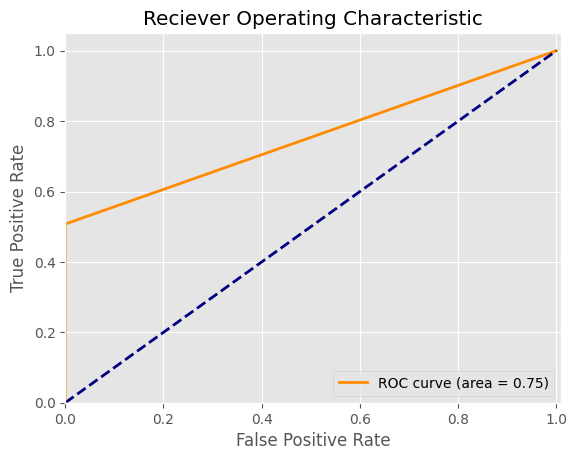

In [ ]:
fpr5, tpr5, thresholds5 = roc_curve(y_test, cart_test)

plt.figure()
plt.plot(fpr5, tpr5, color="darkorange", lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cart)
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle='--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(tabulate({' ': ['Accuracy', "Error Rate", "Sensitivity", "Specificity", "Precision", "F1", "F2", "FO.5"],
'Logistic Regression (Baseline)': [Accuracy_log, ErrorRate_log, Sensitivity_log, Specificity_log, Precision_log, F1_log, F2_log, F0_5_log],
'CART': [Accuracy5, ErrorRate5, Sensitivity5, Specificity5, Precision5, F1_5, F2_5, F0_5_5]}, headers="keys"))

               Logistic Regression (Baseline)       CART
-----------  --------------------------------  ---------
Accuracy                            0.938938   0.964543
Error Rate                          0.0610622  0.0354571
Sensitivity                         0.152083   0.507639
Specificity                         1          1
Precision                           1          1
F1                                  0.264014   0.673422
F2                                  0.183141   0.563087
FO.5                                0.472798   0.837534


Model Evaluations

In [ ]:
model_evaluation_table = {'Evaluation Measure': ['Accuracy', 'Error Rate', 'Recall', 'Precision','Specificity', 'F1', 'ROC AUC'],
'Logistic Regression (Baseline)': [0] * 7, # Initialize with placeholder val
'C5.0': [0] * 7,
'Random Forest': [0] * 7,
'Naive Bayes': [0] *7,
'CART': [0] * 7}
model_evaluation_df = pd.DataFrame(model_evaluation_table)
model_evaluation_df

,Evaluation Measure,Logistic Regression (Baseline),C5.0,Random Forest,Naive Bayes,CART
0,Accuracy,0,0,0,0,0
1,Error Rate,0,0,0,0,0
2,Recall,0,0,0,0,0
3,Precision,0,0,0,0,0
4,Specificity,0,0,0,0,0
5,F1,0,0,0,0,0
6,ROC AUC,0,0,0,0,0


In [ ]:
def format_metric(metric):
  return f'{metric:.4f}'

In [ ]:
#Adding logistic regression
GT_log = TN_log + FP_log + FN_log + TP_log
metrics_log = {
    'Accuracy': (TN_log + TP_log)/GT_log,
    'Error Rate': 1 - ((TN_log + TP_log)/GT_log),
    'Recall': TP_log/(FN_log + TP_log),
    'Precision': TP_log/(FP_log + TP_log),
    'Specificity': TN_log/(TN_log + FP_log),
    'F1': (2 * (TP_log/(FP_log + TP_log)) * (TP_log/(FN_log + TP_log))) /
          ((TP_log/(FP_log + TP_log)) + (TP_log/(FN_log + TP_log))),
    'ROC AUC': roc_auc_score(y_test, test_predictions_log)
}

model_evaluation_df['Logistic Regression (Baseline)'] = [
    metrics_log['Accuracy'],
    metrics_log['Error Rate'],
    metrics_log['Recall'],
    metrics_log['Precision'],
    metrics_log['Specificity'],
    metrics_log['F1'],
    metrics_log['ROC AUC']
]

model_evaluation_df['Logistic Regression (Baseline)'] = model_evaluation_df['Logistic Regression (Baseline)'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)

model_evaluation_df

,Evaluation Measure,Logistic Regression (Baseline),C5.0,Random Forest,Naive Bayes,CART
0,Accuracy,0.9389,0,0,0,0
1,Error Rate,0.0611,0,0,0,0
2,Recall,0.1521,0,0,0,0
3,Precision,1.0000,0,0,0,0
4,Specificity,1.0000,0,0,0,0
5,F1,0.2640,0,0,0,0
6,ROC AUC,0.7817,0,0,0,0


In [ ]:
#Adding C5.0
GT = TN + FP + FN + TP
metrics_log = {
    'Accuracy': (TN + TP)/GT,
    'Error Rate': 1 - ((TN + TP)/GT),
    'Recall': TP/(FN + TP),
    'Precision': TP/(FP + TP),
    'Specificity': TN/(TN + FP),
    'F1': (2 * (TP/(FP + TP)) * (TP/(FN + TP))) /
          ((TP/(FP + TP)) + (TP/(FN + TP))),
    'ROC AUC': roc_auc_c50
}


model_evaluation_df['C5.0'] = [
    metrics_log['Accuracy'],
    metrics_log['Error Rate'],
    metrics_log['Recall'],
    metrics_log['Precision'],
    metrics_log['Specificity'],
    metrics_log['F1'],
    metrics_log['ROC AUC']
]

model_evaluation_df['C5.0'] = model_evaluation_df['C5.0'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)

model_evaluation_df

,Evaluation Measure,Logistic Regression (Baseline),C5.0,Random Forest,Naive Bayes,CART
0,Accuracy,0.9389,0.9645,0,0,0
1,Error Rate,0.0611,0.0355,0,0,0
2,Recall,0.1521,0.5076,0,0,0
3,Precision,1.0000,1.0000,0,0,0
4,Specificity,1.0000,1.0000,0,0,0
5,F1,0.2640,0.6734,0,0,0
6,ROC AUC,0.7817,0.7538,0,0,0


In [ ]:
#Adding Random Forest
GT3 = TN3 + FP3 + FN3 + TP3
metrics_log = {
    'Accuracy': (TN3 + TP3)/GT3,
    'Error Rate': 1 - ((TN3 + TP3)/GT3),
    'Recall': TP3/(FN3 + TP3),
    'Precision': TP3/(FP3 + TP3),
    'Specificity': TN3/(TN3 + FP3),
    'F1': (2 * (TP3/(FP3 + TP3)) * (TP3/(FN3 + TP3))) /
          ((TP3/(FP3 + TP3)) + (TP3/(FN3 + TP3))),
    'ROC AUC': roc_auc_randomforest
}


model_evaluation_df['Random Forest'] = [
    metrics_log['Accuracy'],
    metrics_log['Error Rate'],
    metrics_log['Recall'],
    metrics_log['Precision'],
    metrics_log['Specificity'],
    metrics_log['F1'],
    metrics_log['ROC AUC']
]

model_evaluation_df['Random Forest'] = model_evaluation_df['Random Forest'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)

model_evaluation_df

,Evaluation Measure,Logistic Regression (Baseline),C5.0,Random Forest,Naive Bayes,CART
0,Accuracy,0.9389,0.9645,0.9586,0,0
1,Error Rate,0.0611,0.0355,0.0414,0,0
2,Recall,0.1521,0.5076,0.5139,0,0
3,Precision,1.0000,1.0000,0.8535,0,0
4,Specificity,1.0000,1.0000,0.9932,0,0
5,F1,0.2640,0.6734,0.6415,0,0
6,ROC AUC,0.7817,0.7538,0.7535,0,0


In [ ]:
#Adding Naive Bayes
GT4 = TN4 + FP4 + FN4 + TP4
metrics_log = {
    'Accuracy': (TN4 + TP4)/GT4,
    'Error Rate': 1 - ((TN4 + TP4)/GT4),
    'Recall': TP4/(FN4 + TP4),
    'Precision': TP4/(FP4 + TP4),
    'Specificity': TN4/(TN4 + FP4),
    'F1': (2 * (TP4/(FP4 + TP4)) * (TP4/(FN4 + TP4))) /
          ((TP4/(FP4 + TP4)) + (TP4/(FN4 + TP4))),
    'ROC AUC': roc_auc_naivebayes
}


model_evaluation_df['Naive Bayes'] = [
    metrics_log['Accuracy'],
    metrics_log['Error Rate'],
    metrics_log['Recall'],
    metrics_log['Precision'],
    metrics_log['Specificity'],
    metrics_log['F1'],
    metrics_log['ROC AUC']
]

model_evaluation_df['Naive Bayes'] = model_evaluation_df['Naive Bayes'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)

model_evaluation_df

,Evaluation Measure,Logistic Regression (Baseline),C5.0,Random Forest,Naive Bayes,CART
0,Accuracy,0.9389,0.9645,0.9586,0.4709,0
1,Error Rate,0.0611,0.0355,0.0414,0.5291,0
2,Recall,0.1521,0.5076,0.5139,0.7896,0
3,Precision,1.0000,1.0000,0.8535,0.0996,0
4,Specificity,1.0000,1.0000,0.9932,0.4462,0
5,F1,0.2640,0.6734,0.6415,0.1769,0
6,ROC AUC,0.7817,0.7538,0.7535,0.6179,0


In [ ]:
#Adding CART
GT5 = TN5 + FP5 + FN5 + TP5
metrics_log = {
    'Accuracy': (TN5 + TP5)/GT5,
    'Error Rate': 1 - ((TN5 + TP5)/GT5),
    'Recall': TP5/(FN5 + TP5),
    'Precision': TP5/(FP5 + TP5),
    'Specificity': TN5/(TN5 + FP5),
    'F1': (2 * (TP5/(FP5 + TP5)) * (TP5/(FN5 + TP5))) /
          ((TP5/(FP5 + TP5)) + (TP5/(FN5 + TP5))),
    'ROC AUC': roc_auc_cart
}


model_evaluation_df['CART'] = [
    metrics_log['Accuracy'],
    metrics_log['Error Rate'],
    metrics_log['Recall'],
    metrics_log['Precision'],
    metrics_log['Specificity'],
    metrics_log['F1'],
    metrics_log['ROC AUC']
]

model_evaluation_df['CART'] = model_evaluation_df['CART'].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)

model_evaluation_df

,Evaluation Measure,Logistic Regression (Baseline),C5.0,Random Forest,Naive Bayes,CART
0,Accuracy,0.9389,0.9645,0.9586,0.4709,0.9645
1,Error Rate,0.0611,0.0355,0.0414,0.5291,0.0355
2,Recall,0.1521,0.5076,0.5139,0.7896,0.5076
3,Precision,1.0000,1.0000,0.8535,0.0996,1.0000
4,Specificity,1.0000,1.0000,0.9932,0.4462,1.0000
5,F1,0.2640,0.6734,0.6415,0.1769,0.6734
6,ROC AUC,0.7817,0.7538,0.7535,0.6179,0.7538


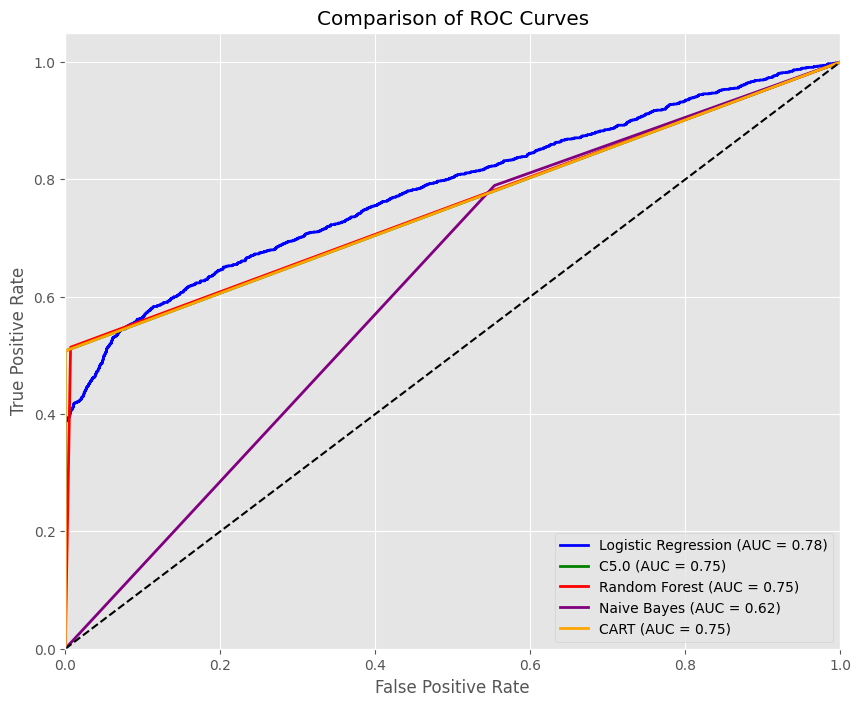

In [ ]:
plt.figure(figsize=(10, 8))

# Plot all ROC curves
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot(fpr2, tpr2, label=f'C5.0 (AUC = {roc_auc_c50:.2f})', color='green', lw=2)
plt.plot(fpr3, tpr3, label=f'Random Forest (AUC = {roc_auc_randomforest:.2f})', color='red', lw=2)
plt.plot(fpr4, tpr4, label=f'Naive Bayes (AUC = {roc_auc_naivebayes:.2f})', color='purple', lw=2)
plt.plot(fpr5, tpr5, label=f'CART (AUC = {roc_auc_cart:.2f})', color='orange', lw=2)

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--',)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

In [ ]:
#Naive Bayes classification
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools

#Version of dataframe without missing values
project_data_train_cl = project_data_train.dropna()

#Array of predictor variables
X_vars = pd.concat((project_data_train_cl['Age'], project_data_train_cl['Time'], project_data_train_cl['Amount']), axis = 1)

#Target variable
Y_var = project_data_train_cl['Fraud']

#NB model using tranformed training set
nb_1 = MultinomialNB().fit(X_vars, Y_var)

In [ ]:
#Predicting values in the test set
X_vtest = pd.concat((project_data_test['Age'], project_data_test['Time'], project_data_test['Amount']), axis = 1)

Y_vtest = project_data_test['Fraud']

Y_predicted1 = nb_1.predict(X_vtest)

In [ ]:
#Comparing predicted values to actual values
ypred1 = pd.crosstab(project_data_test['Fraud'], Y_predicted1, rownames = ['Actual'], colnames = ['Predicted'])
ypred1['Total'] = ypred1.sum(axis = 1); ypred1.loc['Total'] = ypred1.sum()

ypred1

Predicted,0,1,Total
Actual,,,
0,8263,10293,18556
1,303,1137,1440
Total,8566,11430,19996


In [ ]:
cm_nb = confusion_matrix(project_data_test['Fraud'], Y_predicted1)
cm_nb

array([[ 8263, 10293],
       [  303,  1137]])

In [ ]:
TN_nb = cm_nb[0][0]
FP_nb = cm_nb[0][1]
FN_nb = cm_nb[1][0]
TP_nb = cm_nb[1][1]

table_nb = [['', "Predicted: 0", "Predicted: 1"], ["Actual: 0", TN_nb, FP_nb], ["Actual: 1", FN_nb, TP_nb]]
print(tabulate(table_nb, headers='firstrow'))

             Predicted: 0    Predicted: 1
---------  --------------  --------------
Actual: 0            8263           10293
Actual: 1             303            1137


In [ ]:
GT_nb = TN_nb + FP_nb + FN_nb + TP_nb
Accuracy_nb = (TN_nb + TP_nb)/GT_nb
ErrorRate_nb = 1-Accuracy_nb
Sensitivity_nb = TP_nb/(FN_nb + TP_nb)
Recall_nb = Sensitivity_nb
Specificity_nb = TN_nb/(TN_nb + FP_nb)
Precision_nb = TP_nb/(FP_nb + TP_nb)
F1_nb = (2*Precision_nb*Recall_nb)/(Precision_nb + Recall_nb)
F2_nb = (5*Precision_nb*Recall_nb)/((4*Precision_nb) + Recall_nb)
F0_5_nb = (1.25*Precision_nb*Recall_nb)/((.25*Precision_nb)+Recall_nb)
roc_auc_naivebayes1 = roc_auc_score(project_data_test['Fraud'], Y_predicted1)
roc_auc_naivebayes1

np.float64(0.6174420223467701)

In [ ]:
print(tabulate({' ': ['Accuracy', "Error Rate", "Sensitivity", "Specificity", "Precision", "F1", "F2", "F0.5"],
'Naive Bayes': [Accuracy_nb, ErrorRate_nb, Sensitivity_nb, Specificity_nb, Precision_nb, F1_nb, F2_nb, F0_5_nb]},headers="keys"))

               Naive Bayes
-----------  -------------
Accuracy         0.470094
Error Rate       0.529906
Sensitivity      0.789583
Specificity      0.445301
Precision        0.0994751
F1               0.17669
F2               0.330716
F0.5             0.120547


In [ ]:
db_data = data[['Age', 'Time', 'Amount', 'Entry_CVC', 'Entry_PIN']]
db_data

,Age,Time,Amount,Entry_CVC,Entry_PIN
0,25.2,19,5,0,0
1,49.6,17,288,0,1
2,42.2,14,5,0,0
3,51.0,14,28,0,0
4,38.0,23,91,1,0
...,...,...,...,...,...
99995,53.8,22,15,0,0
99996,45.0,23,7,0,1
99997,46.5,11,21,0,1
99998,48.2,22,25,0,0


In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


db_scaled = scaler.fit_transform(db_data)

#Restoring scaled dataset into a pd DataFrame with its column names
scaled_df = pd.DataFrame(db_scaled, columns = db_data.columns)

#Reducing sample size for DBSCAN computation
scaled_df = scaled_df.sample(n=10000)
scaled_df

,Age,Time,Amount,Entry_CVC,Entry_PIN
9920,-0.069722,1.024250,-0.741928,-0.709405,-0.99955
13157,-0.612540,0.270696,2.304209,1.409632,-0.99955
2929,-0.321027,-0.482859,-0.733827,-0.709405,-0.99955
3468,0.774663,-1.424802,-0.069510,-0.709405,1.00045
4328,-0.119983,0.270696,0.554300,-0.709405,1.00045
...,...,...,...,...,...
61460,-0.733167,-0.106082,-0.790537,1.409632,-0.99955
65955,-0.140087,-1.236414,-0.669016,1.409632,-0.99955
25978,0.312262,0.647473,-0.758131,-0.709405,1.00045
25716,0.060957,1.589416,-0.839146,1.409632,-0.99955


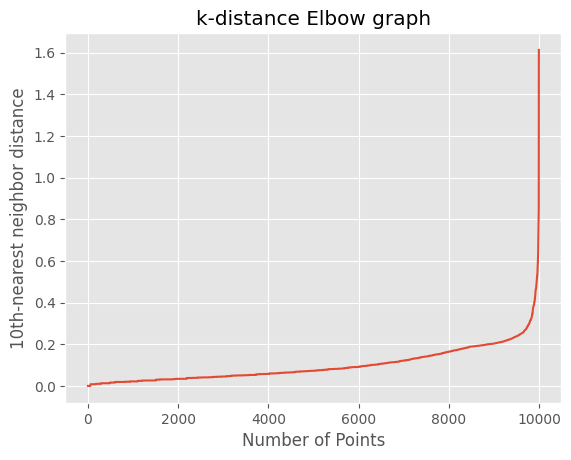

In [ ]:
from sklearn.neighbors import NearestNeighbors

nei = NearestNeighbors(n_neighbors = 10)
nei_fit = nei.fit(scaled_df)
distances, indices = nei_fit.kneighbors(scaled_df)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.title('k-distance Elbow graph')
plt.xlabel('Number of Points')
plt.ylabel('10th-nearest neighbor distance')
plt.plot(distances)

<Axes: title={'center': 'DBSCAN plot'}, xlabel='Amount', ylabel='Age'>

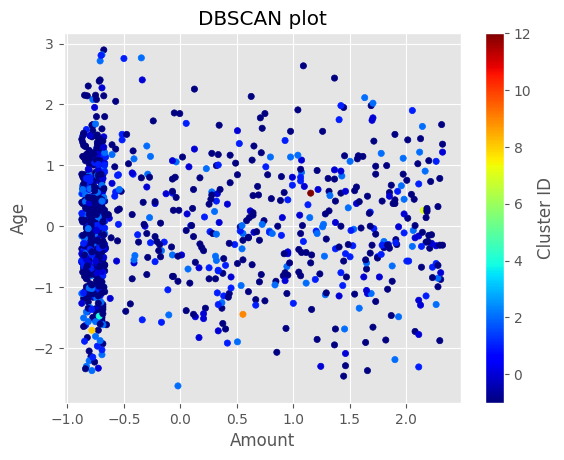

In [ ]:
db = DBSCAN(eps = 0.2, min_samples=10).fit(scaled_df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = pd.DataFrame(db.labels_, columns = ['Cluster ID'])

db_result = pd.concat((scaled_df, db_labels), axis=1)
db_result.plot.scatter(x = 'Amount', y = 'Age', c = 'Cluster ID', colormap = 'jet', title = 'DBSCAN plot')